In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khaledeissa","key":"164de1ff8bdb23444e45d0df16353d00"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

In [ ]:
!kaggle datasets download -d hamzaboulahia/hardfakevsrealfaces

 98% 15.0M/15.3M [00:01<00:00, 16.2MB/s]
100% 15.3M/15.3M [00:01<00:00, 11.0MB/s]


In [ ]:
!unzip hardfakevsrealfaces.zip
import zipfile
import os
import shutil
# Extract the contents of the zip file
zip_path = 'hardfakevsrealfaces.zip'
extract_path = 'hardfakevsrealfaces'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Specify the paths to the extracted data
csv_file = os.path.join(extract_path, 'data.csv')
root_dir = extract_path

Archive:  hardfakevsrealfaces.zip
  inflating: data.csv                
  inflating: fake/fake_1.jpg         
  inflating: fake/fake_10.jpg        
  inflating: fake/fake_100.jpg       
  inflating: fake/fake_101.jpg       
  inflating: fake/fake_102.jpg       
  inflating: fake/fake_103.jpg       
  inflating: fake/fake_104.jpg       
  inflating: fake/fake_105.jpg       
  inflating: fake/fake_106.jpg       
  inflating: fake/fake_107.jpg       
  inflating: fake/fake_108.jpg       
  inflating: fake/fake_109.jpg       
  inflating: fake/fake_11.jpg        
  inflating: fake/fake_110.jpg       
  inflating: fake/fake_111.jpg       
  inflating: fake/fake_112.jpg       
  inflating: fake/fake_113.jpg       
  inflating: fake/fake_114.jpg       
  inflating: fake/fake_115.jpg       
  inflating: fake/fake_116.jpg       
  inflating: fake/fake_117.jpg       
  inflating: fake/fake_118.jpg       
  inflating: fake/fake_119.jpg       
  inflating: fake/fake_12.jpg        
  inflating: fak

In [ ]:
# import shutil
# shutil.rmtree("/content/fake")
# shutil.rmtree("/content/real")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
data=pd.read_csv(r"/content/hardfakevsrealfaces/data.csv")
data.head()

,images_id,label
0,real_1,real
1,real_10,real
2,real_100,real
3,real_101,real
4,real_102,real


In [ ]:
height, width=128, 128
X=np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img=load_img(r"/content/hardfakevsrealfaces/{}/{}.jpg".format(data.loc[i, 'label'], \
                  data.loc[i, 'images_id']), target_size=(height, width))
    X[i]=img_to_array(img)
X.shape

(1289, 128, 128, 3)

In [ ]:
def changeLabels(x):
    return labels[x]

labels=data.label.unique()
labels={labels[i]:i for i in range(labels.size)}
y=data.label.apply(changeLabels)
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y=to_categorical(y, len(labels))
y=y.astype(int)
y[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=8)
X_train.shape, y_train.shape

((1031, 128, 128, 3), (1031, 2))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(height, width, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(2, activation='softmax'))

In [ ]:
epochs=8
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
model.summary()

Epoch 1/8
26/26 [==============================] - 27s 983ms/step - loss: 4.3231 - accuracy: 0.5995 - val_loss: 0.6235 - val_accuracy: 0.6763
Epoch 2/8
26/26 [==============================] - 34s 1s/step - loss: 0.7449 - accuracy: 0.6796 - val_loss: 0.5011 - val_accuracy: 0.8116
Epoch 3/8
26/26 [==============================] - 25s 948ms/step - loss: 0.4574 - accuracy: 0.7706 - val_loss: 0.1851 - val_accuracy: 0.9565
Epoch 4/8
26/26 [==============================] - 33s 1s/step - loss: 0.2356 - accuracy: 0.8944 - val_loss: 0.1192 - val_accuracy: 0.9758
Epoch 5/8
26/26 [==============================] - 23s 882ms/step - loss: 0.1490 - accuracy: 0.9454 - val_loss: 0.0927 - val_accuracy: 0.9565
Epoch 6/8
26/26 [==============================] - 26s 951ms/step - loss: 0.0797 - accuracy: 0.9769 - val_loss: 0.0489 - val_accuracy: 0.9855
Epoch 7/8
26/26 [==============================] - 28s 1s/step - loss: 0.0440 - accuracy: 0.9806 - val_loss: 0.0306 - val_accuracy: 0.9952
Epoch 8/8
26/26

Text(0.5, 1.0, 'Training and validation loss')

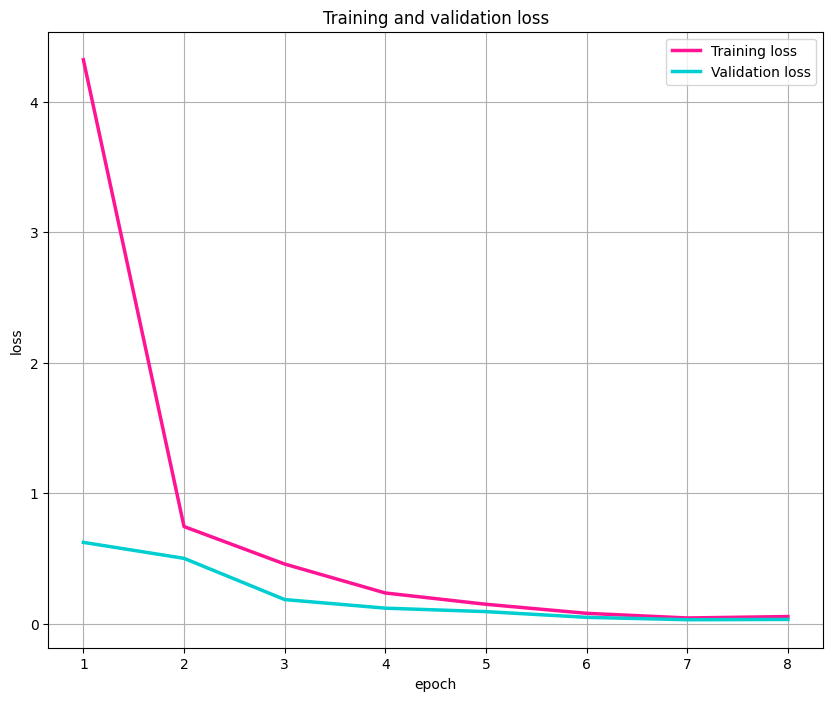

In [ ]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(1, epochs+1))
plot.figure(figsize=(10, 8))
sb.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")

Text(0.5, 1.0, 'Training and validation accuracy')

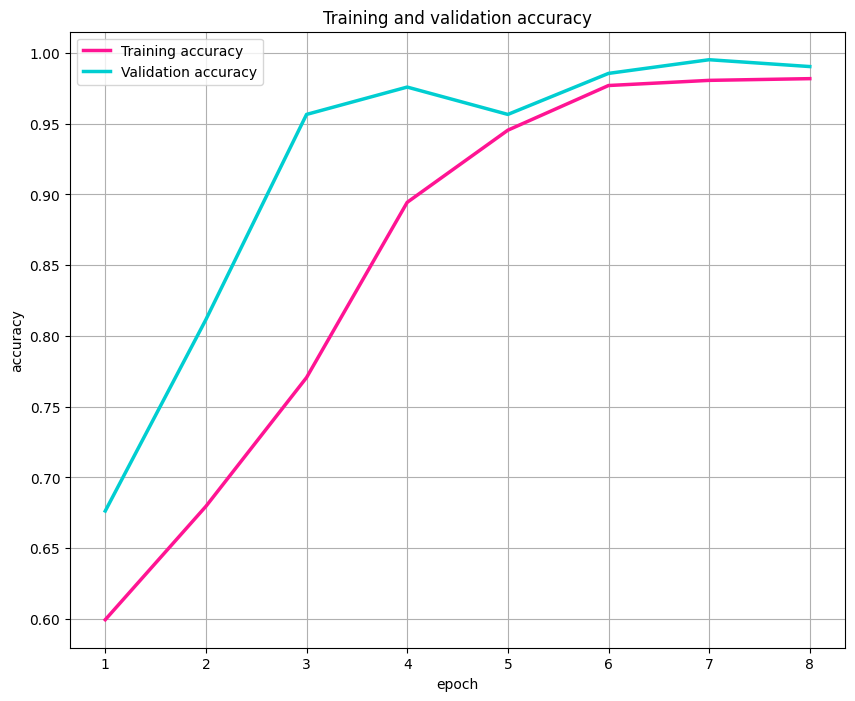

In [ ]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(1, epochs+1))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")

In [ ]:
print('Accuracy:')
_, accuracy=model.evaluate(X_test, y_test)

Accuracy:
9/9 [==============================] - 2s 196ms/step - loss: 0.0670 - accuracy: 0.9806
